### This notebook fits multiple time series prediction model

In [1]:
!pip install yfinance
!pip install keras
!pip install tensorflow

In [2]:
# import modules
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf, adfuller
import bs4 as bs
import pickle
import requests

In [3]:
import seaborn as sns
%matplotlib inline

In [4]:
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.linear_model import Ridge
from yellowbrick.regressor import PredictionError, ResidualsPlot
import lightgbm as lgb
from sklearn import metrics
from sklearn import linear_model
from sklearn import tree
from sklearn import model_selection

In [5]:
def save_sp500_tickers():
    resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text)
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker)
    with open('sp500_tickers.pickle', 'wb') as f:
        pickle.dump(tickers, f)
    return tickers 

In [6]:
ticker_list_raw = save_sp500_tickers()
ticker_list = [i.strip('\n') for i in ticker_list_raw]

In [7]:
ticker_list

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ATVI',
 'ADM',
 'ADBE',
 'ADP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AMD',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BBWI',
 'BAX',
 'BDX',
 'WRB',
 'BRK.B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF.B',
 'BG',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CDAY',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA

In [8]:
start = pd.Timestamp("2019-12-31") - pd.DateOffset(years=2)
end = pd.Timestamp("2019-12-31")
start, end

(Timestamp('2017-12-31 00:00:00'), Timestamp('2019-12-31 00:00:00'))

In [9]:
def autocorrelation(symbol):
    tckr = yf.Ticker(symbol)
    data = tckr.history(start = start, end=end)
    pacf_values = list(pacf(data['Open'], nlags=59))
    pacf_values = pacf_values[1:]
    pacf_values_abs = [abs(i) for i in pacf_values]
    return pacf_values_abs

In [10]:
df = pd.DataFrame()

In [11]:
for symbol in ticker_list:
    try:
        print(symbol)
        pacf_values_abs = autocorrelation(symbol)
        df[symbol]=pacf_values_abs
    except:
        print("No data found")

MMM
AOS
ABT
ABBV
ACN
ATVI
ADM
ADBE
ADP
AES
AFL
A
APD
AKAM
ALK
ALB
ARE
ALGN
ALLE
LNT
ALL
GOOGL
GOOG
MO
AMZN
AMCR
AMD
AEE
AAL
AEP
AXP
AIG
AMT
AWK
AMP
ABC
AME
AMGN
APH
ADI
ANSS
AON
APA
AAPL
AMAT
APTV
ACGL
ANET
AJG
AIZ
T
ATO
ADSK
AZO
AVB
AVY
AXON
BKR
BALL
BAC
BBWI
BAX
BDX
WRB
BRK.B


BRK.B: No timezone found, symbol may be delisted


No data found
BBY
BIO
TECH
BIIB
BLK
BK
BA
BKNG
BWA
BXP
BSX
BMY
AVGO
BR
BRO
BF.B


BF.B: No price data found, symbol may be delisted (1d 2017-12-31 00:00:00 -> 2019-12-31 00:00:00)


No data found
BG
CHRW
CDNS
CZR
CPT
CPB
COF
CAH
KMX
CCL
CARR


CARR: Data doesn't exist for startDate = 1514696400, endDate = 1577768400


No data found
CTLT
CAT
CBOE
CBRE
CDW
CE
CNC
CNP
CDAY
CF
CRL
SCHW


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


CHTR


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


CVX


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


CMG


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


CB


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


CHD


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


CI


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


CINF


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


CTAS


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


CSCO


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


C


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


CFG


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


CLX


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


CME


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


CMS


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


KO


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


CTSH


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


CL


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


CMCSA


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


CMA


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


CAG


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


COP


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


ED


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


STZ


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs
CEG: Data doesn't exist for startDate = 1514696400, endDate = 1577768400


CEG
No data found
COO


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


CPRT


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


GLW


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs
C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


CTVA
CSGP


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


COST


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


CTRA


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


CCI


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


CSX


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


CMI


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


CVS


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


DHI


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


DHR


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


DRI


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


DVA


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


DE


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


DAL


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


XRAY


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


DVN


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


DXCM


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


FANG


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


DLR


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


DFS


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


DIS


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


DG


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


DLTR


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


D


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


DPZ


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


DOV


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


DOW


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


DTE


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


DUK


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


DD


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


DXC


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


EMN


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


ETN


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


EBAY


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


ECL


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


EIX


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


EW


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


EA


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


ELV


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


LLY


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


EMR


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


ENPH


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


ETR


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


EOG


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


EPAM


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


EQT


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


EFX


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


EQIX


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


EQR


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


ESS


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


EL


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


ETSY


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


EG


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


EVRG


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


ES


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


EXC


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


EXPE


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


EXPD


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


EXR


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


XOM


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


FFIV


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


FDS


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


FICO


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


FAST


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


FRT


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


FDX


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


FITB


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


FSLR


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


FE


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


FIS


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


FI


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


FLT


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


FMC


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


F


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


FTNT


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


FTV


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


FOXA


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


FOX


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


BEN


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


FCX


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


GRMN


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


IT


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs
GEHC: Data doesn't exist for startDate = 1514696400, endDate = 1577768400


GEHC
No data found
GEN


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


GNRC


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


GD


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


GE


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


GIS


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


GM


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


GPC


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


GILD


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


GL


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


GPN


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


GS


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


HAL


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


HIG


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


HAS


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


HCA


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


PEAK


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


HSIC


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


HSY


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


HES


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


HPE


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


HLT


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


HOLX


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


HD


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


HON


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


HRL


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


HST


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


HWM


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


HPQ


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


HUM


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


HBAN


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


HII


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


IBM


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


IEX


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


IDXX


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


ITW


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


ILMN


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


INCY


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


IR


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


PODD


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


INTC


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


ICE


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


IFF


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


IP


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


IPG


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


INTU


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


ISRG


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


IVZ


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


INVH


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


IQV


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


IRM


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


JBHT


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


JKHY


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


J


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


JNJ


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


JCI


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


JPM


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


JNPR


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


K


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


KVUE


KVUE: Data doesn't exist for startDate = 1514696400, endDate = 1577768400


No data found
KDP


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


KEY


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


KEYS


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


KMB


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


KIM


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


KMI


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


KLAC


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


KHC


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


KR


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


LHX


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


LH


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


LRCX


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


LW


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


LVS


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


LDOS


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


LEN


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


LNC


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


LIN


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


LYV


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


LKQ


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


LMT


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


L


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


LOW


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


LYB


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


MTB


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


MRO


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


MPC


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


MKTX


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


MAR


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


MMC


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


MLM


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


MAS


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


MA


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


MTCH


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


MKC


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


MCD


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


MCK


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


MDT


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


MRK


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


META


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


MET


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


MTD


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


MGM


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


MCHP


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


MU


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


MSFT


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


MAA


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


MRNA


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


MHK


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


MOH


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


TAP


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


MDLZ


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


MPWR


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


MNST


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


MCO


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


MS


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


MOS


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


MSI


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


MSCI


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


NDAQ


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


NTAP


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


NFLX


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


NWL


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


NEM


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


NWSA


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


NWS


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


NEE


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


NKE


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


NI


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


NDSN


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


NSC


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


NTRS


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


NOC


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


NCLH


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


NRG


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


NUE


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


NVDA


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


NVR


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


NXPI


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


ORLY


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


OXY


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


ODFL


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


OMC


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


ON


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


OKE


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


ORCL


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs
OGN: Data doesn't exist for startDate = 1514696400, endDate = 1577768400


OGN
No data found
OTIS


OTIS: Data doesn't exist for startDate = 1514696400, endDate = 1577768400


No data found
PCAR


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


PKG


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


PANW


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


PARA


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


PH


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


PAYX


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


PAYC


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


PYPL


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


PNR


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


PEP


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


PFE


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


PCG


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


PM


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


PSX


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


PNW


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


PXD


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


PNC


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


POOL


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


PPG


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


PPL


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


PFG


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


PG


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


PGR


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


PLD


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


PRU


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


PEG


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


PTC


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


PSA


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


PHM


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


QRVO


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


PWR


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


QCOM


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


DGX


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


RL


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


RJF


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


RTX


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


O


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


REG


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


REGN


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


RF


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


RSG


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


RMD


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


RVTY


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


RHI


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


ROK


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


ROL


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


ROP


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


ROST


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


RCL


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


SPGI


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


CRM


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


SBAC


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


SLB


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


STX


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


SEE


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


SRE


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


NOW


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


SHW


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


SPG


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


SWKS


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


SJM


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


SNA


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


SEDG


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


SO


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


LUV


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


SWK


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


SBUX


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


STT


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


STLD


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


STE


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


SYK


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


SYF


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


SNPS


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


SYY


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


TMUS


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


TROW


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


TTWO


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


TPR


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


TRGP


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


TGT


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


TEL


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


TDY


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


TFX


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


TER


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


TSLA


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


TXN


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


TXT


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


TMO


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


TJX


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


TSCO


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


TT


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


TDG


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


TRV


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


TRMB


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


TFC


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


TYL


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


TSN


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


USB


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


UDR


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


ULTA


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


UNP


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


UAL


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


UPS


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


URI


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


UNH


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


UHS


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


VLO


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


VTR


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


VRSN


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


VRSK


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


VZ


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


VRTX


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


VFC


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


VTRS


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


VICI


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


V


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


VMC


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


WAB


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


WBA


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


WMT


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


WBD


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


WM


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


WAT


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


WEC


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


WFC


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


WELL


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


WST


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


WDC


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


WRK


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


WY


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


WHR


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


WMB


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


WTW


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


GWW


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


WYNN


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


XEL


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


XYL


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


YUM


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


ZBRA


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


ZBH


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


ZION


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


ZTS


C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\3174829695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[symbol]=pacf_values_abs


In [12]:
df[:5]

,MMM,AOS,ABT,ABBV,ACN,ATVI,ADM,ADBE,ADP,AES,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
0,0.988797,0.992545,0.992930,0.989204,0.988465,0.995387,0.982912,0.978739,0.992356,0.991660,...,0.992291,0.977414,0.991610,0.996688,0.973116,0.996594,0.986449,0.985314,0.982445,0.991587
1,0.055442,0.014471,0.014991,0.096599,0.014638,0.160520,0.027792,0.055299,0.051917,0.025777,...,0.007399,0.056204,0.068523,0.007715,0.020240,0.035218,0.030673,0.030722,0.065374,0.000221
2,0.030017,0.023673,0.042733,0.046918,0.030708,0.058214,0.021906,0.015936,0.016333,0.028320,...,0.034275,0.032427,0.026206,0.054025,0.050955,0.108517,0.019092,0.000743,0.032912,0.012414
3,0.040395,0.056661,0.021562,0.037871,0.015088,0.135925,0.049107,0.013673,0.006109,0.021256,...,0.037984,0.003142,0.094203,0.012449,0.019722,0.029949,0.031194,0.012003,0.038690,0.001219
4,0.041721,0.001400,0.066882,0.033913,0.005018,0.052588,0.040783,0.049609,0.056061,0.031652,...,0.013517,0.001443,0.101121,0.087159,0.019028,0.053954,0.051816,0.004420,0.027316,0.021357


In [13]:
symbol_max_coeff = df.max()

In [14]:
symbol_max_coeff

MMM     0.988797
AOS     0.992545
ABT     0.992930
ABBV    0.989204
ACN     0.988465
          ...   
YUM     0.996594
ZBRA    0.986449
ZBH     0.985314
ZION    0.982445
ZTS     0.991587
Length: 495, dtype: float64

In [15]:
symbol_max_coeff_sorted = symbol_max_coeff.sort_values(ascending=False)

In [16]:
symbol_max_coeff_sorted

WELL    4.232141
VTR     3.200145
ESS     2.911857
DOW     2.722352
HSY     0.998053
          ...   
CVX     0.958334
JNPR    0.953306
BA      0.951649
IPG     0.918564
CTVA    0.905435
Length: 495, dtype: float64

In [17]:
best_symbols = list(symbol_max_coeff_sorted.index)
best_symbols[:10]

['WELL', 'VTR', 'ESS', 'DOW', 'HSY', 'O', 'BALL', 'CINF', 'HAL', 'SBUX']

In [18]:
stock_data = pd.DataFrame()
for t in best_symbols[:10]:
    tckr = yf.Ticker(t)
    data = tckr.history(start = start, end=end)
    data = data[["Close", "Volume"]]
    data["ticker"] = t
    stock_data = stock_data.append(data)
    #print(len(stock_data))

C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\1229950299.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_data = stock_data.append(data)
C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\1229950299.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_data = stock_data.append(data)
C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\1229950299.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_data = stock_data.append(data)
C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\1229950299.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_data = stock_data.append(data)
C:\Users\Owner\AppData\Local\Temp\ipykernel_

In [19]:
stock_data.ticker.nunique()

10

In [20]:
stock_data["date"] = stock_data.index
stock_data["date"] = pd.to_datetime(stock_data['date']).dt.date
stock_data.head()

,Close,Volume,ticker,date
Date,,,,
2018-01-02 00:00:00-05:00,50.694931,1997300,WELL,2018-01-02
2018-01-03 00:00:00-05:00,50.782024,1832600,WELL,2018-01-03
2018-01-04 00:00:00-05:00,49.689434,1993500,WELL,2018-01-04
2018-01-05 00:00:00-05:00,49.380642,2003300,WELL,2018-01-05
2018-01-08 00:00:00-05:00,49.554836,1623200,WELL,2018-01-08


In [21]:
#ics_monthly = pd.read_csv('http://www.sca.isr.umich.edu/files/tbmics.csv')

### Read and Process CPI Data

In [22]:
cpi_monthly = pd.read_excel("macro-data/CPI-data.xlsx")

In [23]:
cpi_monthly.head()

,year-month,cpi
0,197001,15.9
1,197002,16.0
2,197003,16.1
3,197004,16.2
4,197005,16.3


In [24]:
# Construct date column from year and month
cpi_monthly["date"] = np.nan
for i in range(len(cpi_monthly)):
    cpi_monthly.iloc[i, 2] = pd.to_datetime(str(cpi_monthly.iloc[i,0])[:4] + '-' + str(cpi_monthly.iloc[i,0])[4:])
cpi_monthly["date"] = pd.to_datetime(cpi_monthly.date)
cpi_monthly.head()

,year-month,cpi,date
0,197001,15.9,1970-01-01
1,197002,16.0,1970-02-01
2,197003,16.1,1970-03-01
3,197004,16.2,1970-04-01
4,197005,16.3,1970-05-01


In [25]:
# Convert monthly cpi data into daily data
cpi_monthly.index = cpi_monthly.date
dates = pd.date_range(cpi_monthly.date.min(), cpi_monthly.date.max(), freq='D')
cpi_daily = cpi_monthly.reindex(dates, method='ffill')
cpi_daily["date"] = cpi_daily.index
cpi_daily.drop(["year-month"], axis = 1, inplace=True)
del dates, cpi_monthly

### Read and process unemployment data

In [26]:
unemp_yearly = pd.read_csv("macro-data/unemployment-data.csv")
unemp_yearly.tail()

,year,unemp
27,2018,3.900
28,2019,3.670
29,2020,8.050
30,2021,5.350
31,2022,3.611


In [27]:
# Construct date column from year and month
unemp_yearly["date"] = np.nan
for i in range(len(unemp_yearly)):
    unemp_yearly.iloc[i, 2] = pd.to_datetime(str(unemp_yearly.iloc[i,0]) + '-' + '01-01')
unemp_yearly["date"] = pd.to_datetime(unemp_yearly.date)

In [28]:
# Convert yearly unemployment data into daily data
unemp_yearly.index = unemp_yearly.date
dates = pd.date_range(unemp_yearly.date.min(), unemp_yearly.date.max(), freq='D')
unemp_daily = unemp_yearly.reindex(dates, method='ffill')
unemp_daily["date"] = unemp_daily.index
unemp_daily.drop(["year"], axis = 1, inplace=True)
del dates, unemp_yearly
unemp_daily.head()

,unemp,date
1991-01-01,6.8,1991-01-01
1991-01-02,6.8,1991-01-02
1991-01-03,6.8,1991-01-03
1991-01-04,6.8,1991-01-04
1991-01-05,6.8,1991-01-05


In [29]:
int_rates = pd.read_csv("macro-data/int-rate/daily-treasury-rates-2017.csv")
int_rates2018 = pd.read_csv("macro-data/int-rate/daily-treasury-rates-2018.csv")
int_rates2019 = pd.read_csv("macro-data/int-rate/daily-treasury-rates-2019.csv")
int_rates2020 = pd.read_csv("macro-data/int-rate/daily-treasury-rates-2020.csv")
int_rates2021 = pd.read_csv("macro-data/int-rate/daily-treasury-rates-2021.csv")
int_rates2022 = pd.read_csv("macro-data/int-rate/daily-treasury-rates-2022.csv")
int_rates = int_rates.append(int_rates2018)
int_rates = int_rates.append(int_rates2019)
int_rates = int_rates.append(int_rates2020)
int_rates = int_rates.append(int_rates2021)
int_rates = int_rates.append(int_rates2022)

int_rates["date"] = pd.to_datetime(int_rates.Date).dt.date
del int_rates2018, int_rates2019, int_rates2020, int_rates2021, int_rates2022
int_rates.head(1)

C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\2846727729.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  int_rates = int_rates.append(int_rates2018)
C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\2846727729.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  int_rates = int_rates.append(int_rates2019)
C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\2846727729.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  int_rates = int_rates.append(int_rates2020)
C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\2846727729.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  int_rates = int_rates.append(int_rates2021)
C:\Users\Owner\

,Date,4 WEEKS BANK DISCOUNT,4 WEEKS COUPON EQUIVALENT,13 WEEKS BANK DISCOUNT,13 WEEKS COUPON EQUIVALENT,26 WEEKS BANK DISCOUNT,26 WEEKS COUPON EQUIVALENT,52 WEEKS BANK DISCOUNT,52 WEEKS COUPON EQUIVALENT,8 WEEKS BANK DISCOUNT,8 WEEKS COUPON EQUIVALENT,17 WEEKS BANK DISCOUNT,17 WEEKS COUPON EQUIVALENT,date
0,12/29/2017,1.25,1.27,1.37,1.39,1.5,1.53,1.7,1.74,NaN,NaN,NaN,NaN,2017-12-29


In [30]:
int_rates=int_rates[["4 WEEKS BANK DISCOUNT", "date"]]
int_rates = int_rates.rename(columns={"4 WEEKS BANK DISCOUNT": "int_rate"})

In [31]:
int_rates["date"] = pd.to_datetime(int_rates.date).dt.date
unemp_daily["date"] = pd.to_datetime(unemp_daily.date).dt.date
cpi_daily["date"] = pd.to_datetime(cpi_daily.date).dt.date

In [32]:
macro_data = cpi_daily.merge(unemp_daily,on='date',how="left").merge(int_rates,on='date',how="left")
macro_data["date"] = pd.to_datetime(macro_data['date']).dt.date
macro_data.tail()

,cpi,date,unemp,int_rate
19323,125.60,2022-11-27,NaN,NaN
19324,125.60,2022-11-28,NaN,3.96
19325,125.60,2022-11-29,NaN,3.92
19326,125.60,2022-11-30,NaN,3.91
19327,125.22,2022-12-01,NaN,3.87


In [33]:
stock_data_merged = stock_data.merge(macro_data,on='date',how="left")
stock_data_merged = stock_data_merged.dropna(subset=['int_rate'])
stock_data_merged = stock_data_merged.rename(columns={"Close": "price"})
stock_data_merged.head()

,price,Volume,ticker,date,cpi,unemp,int_rate
0,50.694931,1997300,WELL,2018-01-02,104.6,3.9,1.27
1,50.782024,1832600,WELL,2018-01-03,104.6,3.9,1.27
2,49.689434,1993500,WELL,2018-01-04,104.6,3.9,1.25
3,49.380642,2003300,WELL,2018-01-05,104.6,3.9,1.24
4,49.554836,1623200,WELL,2018-01-08,104.6,3.9,1.26


In [34]:
#stock_data_merged.date.dt.date
pd.to_datetime(stock_data_merged['date']).dt.weekday

0       1
1       2
2       3
3       4
4       0
       ..
4711    0
4712    1
4713    3
4714    4
4715    0
Name: date, Length: 4678, dtype: int64

In [35]:
def date_features(df):
    #df["date"] = pd.to_datetime(df["date"])
    #df["day"] = df.date.dt.day
    df["month"] = pd.to_datetime(stock_data_merged['date']).dt.month
    df["week_day"] = pd.to_datetime(stock_data_merged['date']).dt.weekday
    df.drop(columns="date", inplace=True)
    return df

def price_features(df):
    df["lag_t28"] = df["price"].transform(lambda x: x.shift(28))
    df["rolling_mean_t7_price"] = df["price"].transform(lambda x:x.shift(28).rolling(7).mean())
    df['rolling_mean_t30_price'] = df['price'].transform(lambda x: x.shift(28).rolling(30).mean())
    df['rolling_mean_t60_price'] = df['price'].transform(lambda x: x.shift(28).rolling(60).mean())
    df['rolling_mean_t90_price'] = df['price'].transform(lambda x: x.shift(28).rolling(90).mean())
    df['rolling_mean_t180_price'] = df['price'].transform(lambda x: x.shift(28).rolling(180).mean())
    df['rolling_std_t7_price'] = df['price'].transform(lambda x: x.shift(28).rolling(7).std())
    df['rolling_std_t30_price'] = df['price'].transform(lambda x: x.shift(28).rolling(30).std())
    df.fillna(0, inplace=True)
    return df

def intrate_features(df):
    df["lead_t7_int_rate"] = df["int_rate"].transform(lambda x: x.shift(-7))
    df["lead_t14_int_rate"] = df["int_rate"].transform(lambda x: x.shift(-14))
    df["lead_t21_int_rate"] = df["int_rate"].transform(lambda x: x.shift(-21))
    df["lead_t28_int_rate"] = df["int_rate"].transform(lambda x: x.shift(-28))
    df.fillna(0, inplace=True)
    return df

In [36]:
stock_data_final = pd.DataFrame()
for item in stock_data_merged.ticker.unique():
    one_item = stock_data_merged[stock_data_merged.ticker == item]
    one_item = intrate_features(one_item)
    one_item = price_features(one_item)
    one_item = date_features(one_item)
    stock_data_final = pd.concat([stock_data_final, one_item], ignore_index=True)

C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\4227042148.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["lead_t7_int_rate"] = df["int_rate"].transform(lambda x: x.shift(-7))
C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\4227042148.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["lead_t14_int_rate"] = df["int_rate"].transform(lambda x: x.shift(-14))
C:\Users\Owner\AppData\Local\Temp\ipykernel_17084\4227042148.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [37]:
stock_data_final = pd.get_dummies(stock_data_final, columns=['ticker'])
stock_data_final.head()

,price,Volume,cpi,unemp,int_rate,lead_t7_int_rate,lead_t14_int_rate,lead_t21_int_rate,lead_t28_int_rate,lag_t28,...,ticker_BALL,ticker_CINF,ticker_DOW,ticker_ESS,ticker_HAL,ticker_HSY,ticker_O,ticker_SBUX,ticker_VTR,ticker_WELL
0,50.694931,1997300,104.6,3.9,1.27,1.29,1.24,1.39,1.31,0.0,...,0,0,0,0,0,0,0,0,0,1
1,50.782024,1832600,104.6,3.9,1.27,1.28,1.23,1.38,1.32,0.0,...,0,0,0,0,0,0,0,0,0,1
2,49.689434,1993500,104.6,3.9,1.25,1.31,1.20,1.37,1.30,0.0,...,0,0,0,0,0,0,0,0,0,1
3,49.380642,2003300,104.6,3.9,1.24,1.29,1.21,1.46,1.28,0.0,...,0,0,0,0,0,0,0,0,0,1
4,49.554836,1623200,104.6,3.9,1.26,1.26,1.24,1.34,1.33,0.0,...,0,0,0,0,0,0,0,0,0,1


<Axes: >

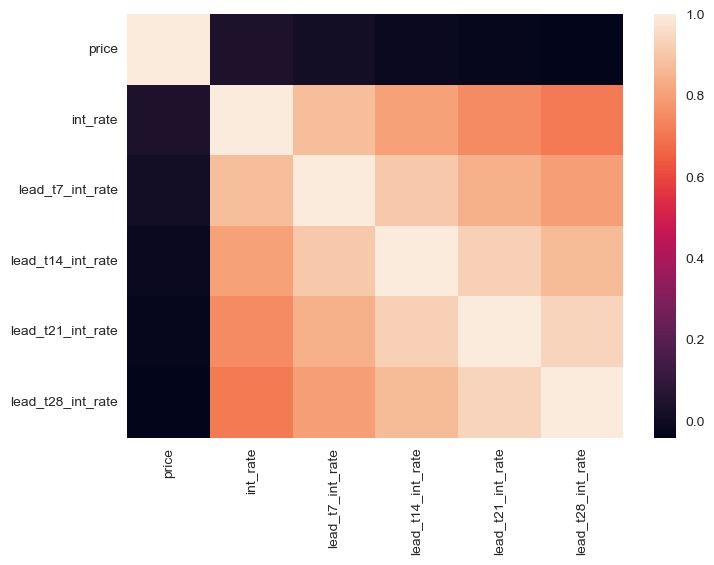

In [38]:
sns.heatmap(stock_data_final[["price", "int_rate", "lead_t7_int_rate", "lead_t14_int_rate", \
                              "lead_t21_int_rate", "lead_t28_int_rate"]].corr())

In [39]:
stock_data_final[["price", "int_rate", "lead_t7_int_rate", "lead_t14_int_rate", \
                              "lead_t21_int_rate", "lead_t28_int_rate"]].corr()

,price,int_rate,lead_t7_int_rate,lead_t14_int_rate,lead_t21_int_rate,lead_t28_int_rate
price,1.000000,0.037305,0.009763,-0.010393,-0.027125,-0.041213
int_rate,0.037305,1.000000,0.874386,0.804185,0.751857,0.710947
lead_t7_int_rate,0.009763,0.874386,1.000000,0.904476,0.843055,0.795035
lead_t14_int_rate,-0.010393,0.804185,0.904476,1.000000,0.923099,0.869532
lead_t21_int_rate,-0.027125,0.751857,0.843055,0.923099,1.000000,0.936206
lead_t28_int_rate,-0.041213,0.710947,0.795035,0.869532,0.936206,1.000000


In [40]:
# train-test-val split
X = stock_data_final.drop(columns=['price'])
y = stock_data_final['price']
X_train_macro, X_val_macro, y_train, y_val = model_selection.train_test_split(X,y,test_size=0.10, random_state=42)

In [41]:
X_arr = X.values
y_arr = y.values

In [42]:
lr = LinearRegression()
lr.fit(X_train_macro, y_train)
lr.coef_

array([-4.82328915e-07,  4.57513489e+00,  1.05740668e+01, -1.77971242e+01,
        4.28517001e-01,  8.37376683e-01,  5.52395961e-02,  3.41705251e+00,
        8.67350117e-02,  2.34075025e-02, -8.51256776e-03, -1.52117839e-02,
        7.38842008e-02,  1.88822382e-01,  4.29826106e-01,  1.16123898e+00,
       -6.54625457e-01,  5.55446403e-02, -1.94318096e+01, -4.89865919e-01,
       -2.27628670e+01,  1.12113379e+02, -3.04824795e+01,  2.13043838e+01,
       -1.94339218e+01, -7.06936241e+00, -2.10239312e+01, -1.27235256e+01])

In [43]:
X_train_macro.columns

Index(['Volume', 'cpi', 'unemp', 'int_rate', 'lead_t7_int_rate',
       'lead_t14_int_rate', 'lead_t21_int_rate', 'lead_t28_int_rate',
       'lag_t28', 'rolling_mean_t7_price', 'rolling_mean_t30_price',
       'rolling_mean_t60_price', 'rolling_mean_t90_price',
       'rolling_mean_t180_price', 'rolling_std_t7_price',
       'rolling_std_t30_price', 'month', 'week_day', 'ticker_BALL',
       'ticker_CINF', 'ticker_DOW', 'ticker_ESS', 'ticker_HAL', 'ticker_HSY',
       'ticker_O', 'ticker_SBUX', 'ticker_VTR', 'ticker_WELL'],
      dtype='object')

In [44]:
import statsmodels.api as sm

#define predictor and response variables
#y = df['score']
#x = df[['hours', 'exams']]

#add constant to predictor variables
#x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y_train, X_train_macro).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     9470.
Date:                Mon, 28 Aug 2023   Prob (F-statistic):               0.00
Time:                        23:23:44   Log-Likelihood:                -14458.
No. Observations:                4210   AIC:                         2.897e+04
Df Residuals:                    4182   BIC:                         2.915e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Volume                  -4

In [45]:
X_train = X_train_macro.drop(columns = ["int_rate", "cpi", "unemp", "lead_t7_int_rate", "lead_t14_int_rate", "lead_t21_int_rate", "lead_t28_int_rate"])
X_val = X_val_macro.drop(columns = ["int_rate", "cpi", "unemp", "lead_t7_int_rate", "lead_t14_int_rate", "lead_t21_int_rate", "lead_t28_int_rate"])

In [46]:
def modelperformance(model_s, X_train, X_val, y_train, y_val):
    model_s=model_s.fit(X_train,y_train)#Fitting train data for sales
    y_pred=model_s.predict(X_val)#predicting sales with test data
    return model_s, metrics.mean_absolute_error(y_val,y_pred), np.sqrt(metrics.mean_squared_error(y_val,y_pred))

In [47]:
models = [linear_model.Lasso(alpha=0.1), Ridge(alpha=1.0), lgb.LGBMRegressor(), RandomForestRegressor, xgb.XGBRegressor(), tree.DecisionTreeRegressor()]


In [48]:
for model in models:
    try:
        print("\n" + "-"*30)
        print("-"*30)
        print(f"Name of model: {model}")
        model, mae, rmse = modelperformance(model, X_train, X_val, y_train, y_val)
        model, mae_macro, rmse_macro = modelperformance(model, X_train_macro, X_val_macro, y_train, y_val)
        print(f" Without Expected Interest Rates: \n  MAE: {mae} \n  RMSE: {rmse}")
        print("-"*30)
        print(f" With Expected Interest Rates: \n  MAE: {mae_macro} \n  RMSE: {rmse_macro}")
    except:
        print(f"Can not generate results for model: {model}")


------------------------------
------------------------------
Name of model: Lasso(alpha=0.1)
 Without Expected Interest Rates: 
  MAE: 5.603603839939833 
  RMSE: 7.605310174861734
------------------------------
 With Expected Interest Rates: 
  MAE: 5.4780689726503375 
  RMSE: 7.255691126448963

------------------------------
------------------------------
Name of model: Ridge()
 Without Expected Interest Rates: 
  MAE: 5.529472832509619 
  RMSE: 7.474060087253473
------------------------------
 With Expected Interest Rates: 
  MAE: 5.397230526290587 
  RMSE: 7.190055476844044

------------------------------
------------------------------
Name of model: LGBMRegressor()


C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.26082e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.2531e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2333
[LightGBM] [Info] Number of data points in the train set: 4210, number of used features: 21
[LightGBM] [Info] Start training from score 78.735684
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000387 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2919
[LightGBM] [Info] Number of data points in the train set: 4210, number of used features: 28
[LightGBM] [Info] Start training from score 78.735684
 Without Expected Interest Rates: 
  MAE: 1.2491366234300831 
  RMSE: 1.7512885359891321
------------------------------
 With Expected Interest Rates: 
  MAE: 1.1821173910644596 
  RMSE: 1.6416338690087573

------------------------------
--------